# PRÁTICA GUIADA - Probabilidades.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

## Amostra de distribuições com numpy

#### A biblioteca aleatória numpy oferece um conjunto de funções que geram valores aleatórios, esses valores podem vir de diferentes tipos de distribuições estatísticas e nos fornecem um conjunto de dados pertencentes aos valores do espaço de amostra dessas distribuições.

#### Na prática, se precisássemos de um conjunto de 100 dados que sigam uma distribuição normal, teríamos que fazer uma chamada para a função normal indicando a média e o desvio padrão:

```python
    >> media = 0
    >> desvio = 1
    >> numpy.random.normal(media, desvio, 100)
```

#### Vamos trabalhar com dados de diferentes distribuições (dados por numpy.random) para visualizar o comportamento dessas variáveis. A quantidade de dados será grande para podermos apreciar corretamente sua forma gráfica.

#### É importante reconhecer visualmente o comportamento estatístico das variáveis, já que é uma primeira aproximação à modelagem e previsão desses dados. Muitas vezes é possível ter uma ideia de como eles se comportam matematicamente apenas visualizando-os em um gráfico.

## Distribuição uniforme discreta.

#### Diz-se que uma variável segue uma distribuição uniforme discreta se a probabilidade de aparição dos valores em cada ensaio for constante e igual: 

\begin{equation*}
P(x_i)= \dfrac{1}{n}
\end{equation*}

#### Onde **_P_** é a probabilidade, **_x_** valores dentro do espaço amostral e **_n_** a quantidade de elementos do espaço amostral.

#### A seguir, vamos realizar uma chamada à função `.randint()` que ajusta a valores provenientes de uma distribuição uniforme discreta, com a motivação de simular o lançamento de um dado equilibrado 4.500 vezes. Definimos o domínio do dado, onde somamos 1 ao valor máximo... por quê?

In [7]:
valor_min = 1
valor_max = 6 + 1

#### Definimos a quantidade de `lançamentos` do dado.

In [9]:
lançamentos = 4500

#### Fazemos uma chamada à função randint, que retorna o resultado de cada lançamento

In [21]:
samples_uniforme = np.random.randint(low = valor_min, high = valor_max, size = lançamentos)

#### Representamos graficamente os resultados.

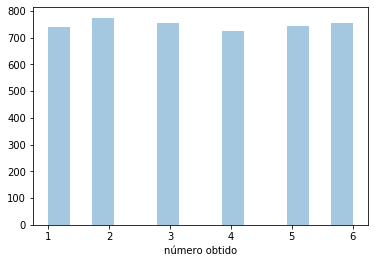

In [22]:
eixo_x = 'número obtido'
sns.distplot(samples_uniforme, axlabel = eixo_x, kde=False);

#### Armazenando os resultados em um DataFrmae.

In [30]:
#samples_uniforme = list(samples_uniforme)
DiceDF = pd.DataFrame(samples_uniforme, columns = ['lançamentos'])

#### Verificando a forma dos dados.

In [38]:
DiceDF.shape

(4500, 1)

#### verificando os dados.

In [39]:
DiceDF.head()

,lançamentos
0,4
1,1
2,6
3,1
4,1


#### contando as proporções dos resultados.

In [54]:
DiceDF['lançamentos'].value_counts(normalize = True)

2    0.172222
6    0.168222
3    0.168000
5    0.165556
1    0.164667
4    0.161333
Name: lançamentos, dtype: float64

#### confirmando os resultados de proporções.

In [55]:
DiceDF['lançamentos'].value_counts()/DiceDF.shape[0]

2    0.172222
6    0.168222
3    0.168000
5    0.165556
1    0.164667
4    0.161333
Name: lançamentos, dtype: float64

## Teorema de Bayes 

Classificação e previsão são dois dos aspectos mais importantes do Machine Learning e o Naive Bayes é um algoritmo simples, mas surpreendentemente poderoso para modelagem preditiva. Então pessoal, neste tutorial do Naive Bayes, serão abordados os seguintes tópicos:

- definição
- exemplo com baralho
- exemplo com predição do tempo para jogo de golf
- aplicações de mercado

## Definição 


### O que é Naive Bayes?

O Naive Bayes está entre um dos algoritmos mais simples, mas mais poderosos para classificação, com base no Teorema de Bayes, com uma suposição de independência entre os preditores. O modelo Naive Bayes é fácil de construir e particularmente útil para conjuntos de dados muito grandes. Existem duas partes nesse algoritmo:

- Ingênuo

- Bayes

O classificador Naive Bayes assume que a presença de um recurso em uma classe não está relacionada a nenhum outro recurso. Mesmo que esses recursos dependam um do outro ou da existência de outros recursos, todas essas propriedades contribuem independentemente para a probabilidade de que uma determinada fruta seja uma maçã, uma laranja ou uma banana, e é por isso que é conhecida como "ingênua".

### Teorema de Bayes

- O que é o teorema de Bayes?

Na teoria estatística e de probabilidade, o teorema de Bayes descreve a probabilidade de um evento, com base no conhecimento prévio de condições que podem estar relacionadas ao evento. Serve como uma maneira de descobrir a probabilidade condicional.

Dada uma hipótese (H) e evidência (E), o teorema de Bayes afirma que a relação entre a probabilidade da hipótese antes de obter a evidência, P (H) e a probabilidade da hipótese após a obtenção da evidência, P (H | E), é:

<br>
<br>
\begin{equation*}
P(Hipótese | Evento) = \dfrac{ P(Evento | Hipótese) . P(Hipótese) }{ P(Evento) }
\end{equation*}
<br>
<br>

- $ P(Hipótese | Evento) $: Probabilidade posterior, ou seja, probabilidade de evento após a evidência ser vista


- $ P(Hipótese) $: Probabilidade à priori ou a probabilidade anterior - probabilidade de evento antes da evidência ser vista


- $ P(Evento | Hipótese) $: Likelyhood (chance)


- $ \dfrac{ P(Evento | Hipótese) }{ P(Evento) } $: Likelyhood ratio (taxa de chance)


## Exemplo do Teorema de Bayes - Jogo de Golf

Considere um conjunto de dados fictício que descreva as condições climáticas para jogar uma partida de golfe. Dadas as condições climáticas, cada tupla classifica as condições como adequadas (“Sim”) ou impróprias (“Não”) para jogar golfe.

Aqui está uma representação tabular do nosso conjunto de dados.

<br>
<img src="img/bayes_dataset.png" width=800>
<br>

O conjunto de dados é dividido em duas partes, a saber, matriz de recursos e o vetor de resposta.

A matriz de recursos contém todos os vetores (linhas) do conjunto de dados nos quais cada vetor consiste no valor dos recursos dependentes. No conjunto de dados acima, os recursos são "Outlook", "Temperatura", "Umidade" e "Com Vento".
O vetor de resposta contém o valor da variável de classe (previsão ou saída) para cada linha da matriz de recurso. No conjunto de dados acima, o nome da variável da classe é "Jogar golfe".
Suposição:

A suposição fundamental de Naive Bayes é que cada recurso faz uma contribuição para o resultado:

- independente
- igual


Com relação ao nosso conjunto de dados, esse conceito pode ser entendido como assumir que nenhum par de recursos é dependente. Por exemplo, a temperatura "quente" não tem nada a ver com a umidade ou a perspectiva de "chuvoso" não afeta os ventos. Portanto, os recursos são assumidos como independentes.

Em segundo lugar, cada recurso recebe o mesmo peso (ou importância). Por exemplo, conhecer apenas a temperatura e a umidade por si só não pode prever o resultado com precisão. Nenhum dos atributos é irrelevante e supõe-se que esteja contribuindo igualmente para o resultado.

Nota: As suposições feitas por Naive Bayes geralmente não são corretas em situações do mundo real. De fato, a suposição de independência nunca é correta, mas geralmente funciona bem na prática.

Agora, antes de passar para a fórmula de Naive Bayes, é importante conhecer o teorema de Bayes.

### Teorema de Bayes

O Teorema de Bayes encontra a probabilidade de um evento ocorrer, dada a probabilidade de outro evento que já ocorreu. O teorema de Bayes é declarado matematicamente como segue.

<br>
\begin{equation*}
P(y | X) = \dfrac{ P(X | y) . P(y) }{ P(X) }
\end{equation*}
<br>

onde y é variável de classe e X é um vetor de recurso dependente (de tamanho n) em que:

<br>
\begin{equation*}
X = (x_1, x_2, x_3, ... , x_n)
\end{equation*}
<br>

- Suposição ingênua

Agora, é hora de colocar uma suposição ingênua no teorema de Bayes, que é a independência entre os recursos. Então agora, dividimos as evidências em partes independentes. Agora, consideremos que os eventos são independentes.

<br>
\begin{equation*}
P(y | x_1, x_2, x_3, ... , x_n) = \dfrac{ P(x_1 | y) . P(x_2 | y) . P(x_3 | y) ... P(x_n | y) . P(y) }{ P(x_1).P(x_2).P(x_3) ... P(x_n) }
\end{equation*}
<br>

Então, finalmente, ficamos com a tarefa de calcular P (y) e P (xi | y). Observe que P (y) também é chamado de probabilidade de classe e P (xi | y) é chamado de probabilidade condicional. Os diferentes classificadores ingênuos de Bayes diferem principalmente pelas premissas que fazem sobre a distribuição de P (xi | y).

Vamos tentar aplicar a fórmula acima manualmente em nosso conjunto de dados climáticos. Para isso, precisamos fazer algumas pré-computações em nosso conjunto de dados. Precisamos encontrar P (xi | yj) para cada xi em X e yj em y. Todos esses cálculos foram demonstrados nas tabelas abaixo:

<br>
<img src="img/bayes_charts.png" width=500>
<br>

Portanto, na figura acima, calculamos 

<br>
\begin{equation*}
P(x_i | y_j)
\end{equation*}
<br>

para cada xi em X e yj em y manualmente nas tabelas 1-4. Por exemplo, probabilidade de jogar golfe, já que a temperatura é baixa, ou seja, 

<br>
\begin{equation*}
P (temp. = Frio | jogar golfe = Sim) = \dfrac{ 3 }{ 9 }
\end{equation*}
<br>

Além disso, precisamos encontrar probabilidades de classe (P (y)) que foram calculadas na tabela 5. Por exemplo, P (jogar golfe = Sim) = 9/14.

Então agora terminamos nossas pré-computações e o classificador está pronto! Vamos testá-lo em um novo conjunto de recursos (vamos chamá-lo hoje):

- **today = (Sunny, Hot, Normal, False)**

Portanto, a probabilidade de jogar golfe é dada por:

<br>
\begin{equation*}
P(Yes|today) = \dfrac{ P(SunnyOutlook|Yes).P(HotTemperature|Yes).P(NormalHumidity|Yes).P(NoWind|Yes).P(Yes) }{ P(today) }
\end{equation*}
<br>

and probability to not play golf is given by:

<br>
\begin{equation*}
P(No|today) = \dfrac{ P(SunnyOutlook|No).P(HotTemperature|No).P(NormalHumidity|No).P(NoWind|Yes).P(No) }{ P(today) }
\end{equation*}
<br>

Agora precisamos considerar que o total das probabilidades de jogar e não-jogar hoje é igual a 1:

<br>
\begin{equation*}
P(Yes|today) + P(No|today) = 1
\end{equation*}
<br>

#### Como P(today) é comum em ambas as probabilidades, podemos ignorar P(today) vamos encontrar probabilidades proporcionais.

In [71]:
P_Yes_today =  ( 3/9 * 2/9 * 6/9 * 6/9 * 9/14 ) / ( 5/14 * 4/14 * 7/14 * 8/14 )
P_No_today = ( 2/5 * 2/5 * 1/5 * 2/5 * 5/14 ) / ( 5/14 * 4/14 * 7/14 * 8/14 )

(P_Yes_today, P_No_today)

(0.7259259259259259, 0.1568)

#### Esses números podem ser convertidos em probabilidade, tornando a soma igual a 1 (normalização):

In [72]:
P_Yes_today_norm = P_Yes_today / (P_Yes_today + P_No_today)
P_No_today_norm = P_No_today / (P_Yes_today + P_No_today)

(P_Yes_today_norm, P_No_today_norm)

(0.8223684210526315, 0.17763157894736842)

#### Portanto, a previsão de que o golfe seria jogado é "Sim".

In [74]:
print(P_Yes_today_norm > P_No_today_norm)

True


# Teorema limite central - Rolagem de dois dados 

<br>
<img src="img/prob_dois_dados.png">
<br>

O programa representa o total da rolagem de dois dados por **n** vezes e exibe o total dso valores acumuladdos em um histograma através da função <span style="color:blue"> **roll_pair( )**</span> que exibe o total das possibilidades dentro do intervalo de **n** vezes. Para a rolagem 1 e a rolagem 2, a função **random** escolherá um número inteiro aleatório de 1-6, e após isso o total da rolagem 1 será adicionado ao total da rolagem 2. Isto irá repetir **n** vezes e depois produzir um histograma, plotando os totais acumulados em uma distribuição.

Sabemos que o valor médio da distribuição é 7 calculado como (2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12) / 12 ou 77/11 = 7.

Podemos ver que a média da amostra não está extatamente no ponto médio, o que é esperado porque é uma estimativa da média populacional, ou amostra.

O procedimento mias interessante aqui é aumentar o __n__ e identificar que a média cada vez mais se aproxima da probabilidade teórica nominal. De acordo com o teorema do limite central, o histograma dessas médias amostrais será uma **Distribuição Normal** ou **Gaussiana**, de acordo com o *teorema do limite central*.

O exemplo abaixo realiza este experimento e plota a distribuição resultante de médias amostrais.

Para uma ferramente interativa online [clique aqui](https://www.openprocessing.org/sketch/124236/)

In [84]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

plt.ion()
np.random.seed(1)

def roll_pair():
    total = []
    n = 10000
    random.seed 
    for choice in range(n):
        roll1 = random.randint(1,6)
        roll2 = random.randint(1,6)
        total += [(roll1 + roll2)]
        
    # print (total)
    
    plt.hist(total, bins = 50)
    plt.show()

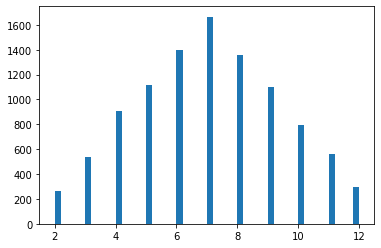

In [78]:
roll_pair()

#### Demonstrando o teorema do limite central.

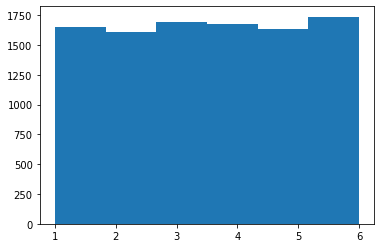

In [81]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
import matplotlib.pyplot

# seed the random number generator
seed(1)

# rolling the dice n times
n = 10000
roll = randint(1, 7, n)

plt.hist(roll, bins = 6)
pyplot.show()

#### Calcular a média de rolagens de k dados n vezes.

<function matplotlib.pyplot.show(*args, **kw)>

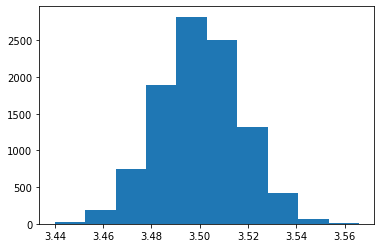

In [83]:
k = n
seed(1)
means = [mean(randint(1, 7, k)) for _ in range(n)]

plt.hist(means)
plt.show

## Distribuição binomial.

#### Mede o número de sucessos em uma sequência de _**n**_ ensaios independentes entre si, com uma probabilidade fixa **_p_** de ocorrência de sucesso entre os ensaios.

#### Em uma distribuição binomial **_X ~ B (n, p)_**, **_p_** é a probabilidade de sucesso (que é fixa), e  _**n**_  é o número de ensaios. 

#### A função da probabilidade é:

\begin{equation*}
f(x)=  \binom {n}{x} (p)^x (1-p)^{(n-x)}
\end{equation*}

#### Em que o termo $\binom {n}{x}$ é conhecido como o binômio de Newton, $n, x$ são inteiros e $x \le n$. O binômio é definido como:

\begin{equation*}
\binom {n}{x} = \frac{n!}{x!(n - x)!}
\end{equation*}


#### Onde **_x_** é a quantidade de acertos, **_p_** a probabilidade de sucesso, **_n_** a quantidade de ensaios.

#### Neste caso, vamos simular o lançamento de uma moeda 8 vezes por ensaio, onde a probabilidade de sucesso (obter cara) será 0,5. A seguir, a função de distribuição para o caso:

\begin{equation*}
f(x)= \binom {8}{x} (0,5)^x (1-0,5)^{(8-x)}
\end{equation*}

#### Vamos realizar um chamado à função `binomial` que ajusta a valores provenientes de una distribuição binomial e vamos realizar 10.000 ensaios para montar a distribuição.


#### Definimos a quantidade de ensaios.

In [131]:
quantidade_ensaios = 1000

#### Definimos a quantidade de lançamentos por ensaio.

In [132]:
lançamentos = 8

#### Definimos la probabilidade de obter cara em cada lançamento.

In [133]:
probabilidade_sucesso = 0.5

#### Binomial retorna o número de sucessos de cada vez que se realizou um ensaio de 8 lançamentos.

In [134]:
samples_binomial = np.random.binomial(n = lançamentos, p = probabilidade_sucesso, size = quantidade_ensaios)

#### Por fim, construímos um gráfico.

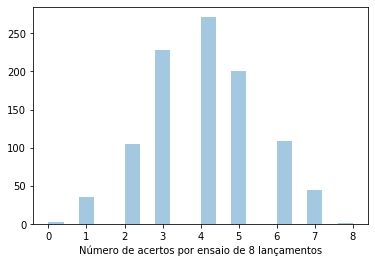

In [135]:
eixo_x = 'Número de acertos por ensaio de 8 lançamentos'
sns.distplot(samples_binomial, axlabel = eixo_x, kde = False);

#### Verificando a série binomial (primeiras 100 observações).

In [136]:
samples_binomial[:100]

array([3, 1, 4, 5, 6, 5, 3, 5, 2, 3, 5, 4, 4, 6, 4, 3, 3, 4, 6, 3, 3, 4,
       4, 4, 4, 7, 6, 3, 4, 7, 3, 3, 2, 5, 4, 3, 3, 5, 4, 3, 3, 5, 4, 5,
       3, 5, 3, 4, 8, 3, 2, 4, 2, 5, 3, 5, 4, 7, 3, 3, 5, 3, 4, 4, 2, 1,
       2, 4, 3, 4, 2, 5, 3, 3, 3, 7, 3, 6, 6, 3, 5, 4, 3, 4, 6, 3, 2, 3,
       4, 4, 5, 5, 5, 1, 2, 4, 2, 2, 3, 5])

#### Verificando o comprimento da série.

In [137]:

samples_binomial.size

1000

### Distribuição binomial: exemplo prático

Suponhamos que em uma linha de produção são fabricadas lâmpadas incandescentes. E elas são embaladas de forma que cada embalagem contenha 10 unidades de lâmpadas. Um Green Belt sabe que a probabilidade de uma lâmpada sair de sua linha de produção com defeito é de 5%. E ele deseja calcular a probabilidade de uma mesma embalagem conter 3 unidades de lâmpadas com defeito. Para ajudarmos a este profissional, você, como entendedor de probabilidade e estatística que é, irá aplicar a seguinte equação da distribuição binomial:

\begin{equation*}
f(3)= \binom {10}{3} (0,05)^3 (1-0,05)^{(10-3)}
\end{equation*}

Leia mais em: https://www.voitto.com.br/blog/artigo/distribuicao-binomial

In [138]:
x=3
n=10
p=0.05
q=1-p

def factorial(n):
    num = 1
    while n >= 1:
        num = num * n
        n = n - 1
    return num

Binomial= ( factorial(n)/( factorial(n-x)*factorial(x) ) ) * ( p**x ) * (1-p)**(n-x)  

Binomial

0.010475059441406248

In [139]:
stats.binom.pmf(k=x,n=n,p=p)

0.010475059441406257

## Densidade de Probabilidade.

#### Uma variável aleatória X que possui uma distribuição binomial representa o número de sucessos em uma sequência de n tentativas sim / não independentes, cada uma das quais produz sucesso com probabilidade p.

$ E (X) = np $ , $ Var (X) = np * (1-p) $

#### onde $E(X)$ é o valor esperado ou média da distribuição.

#### Para saber como funciona cada função, você pode buscar na documentação oficial do [Scipy.Stats.Binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

#### Neste experimento, a probabilidade de obter uma cara é de $\frac{1}{2}$, o que significa que, em média, você pode esperar que 5 em 10 viradas de moeda sejam caras.

#### Será feita a simulação de uma variável aleatória binomial usando [`.rvs()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html). O tamanho do parâmetro especifica quantas simulações se deseja fazer. 

#### O comando pede ao Python que retorne 10000 variáveis aleatórias binomiais com os parâmetros n e p. Será impressa a média e o desvio padrão dessas 10000 variáveis aleatórias. Então será plotado o histograma de todas as variáveis aleatórias simuladas.

mean: 4.9878
SD: 1.59827


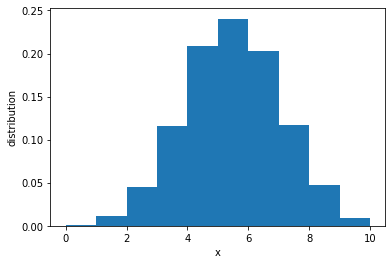

In [140]:
# Importando a biblioteca Binomial
from scipy.stats import binom

# Criando uma série binomial e plotando a simulação em um histograma

binomial_simulation = stats.binom.rvs(n = 10,
                                      p = 0.5,
                                      size = 10000,
                                      random_state = 24
                                     ) # rvs=Random Variates

print('mean: %g'% np.mean(binomial_simulation))
print('SD: %g' % np.std(binomial_simulation))
plt.hist(binomial_simulation, bins = 10, density = True,histtype='barstacked')
plt.xlabel ('x')
plt.ylabel('distribution')
plt.show()

#### É possível definir todos os valores que o coin flip pode tomar com k = [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (0,10), pode-se observar zero caras, uma cara, indo até dez caras. 

#### Será utilizado [`.stats.binom.pmf()`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) para calcular a função densidade de probabilidade para cada observação. Ele retorna uma lista de 10 elementos - esses elementos representam a probabilidade associada a cada observação.

### Criação de uma série binomial com 10 ensaios.

#### Fixando a semente de início da criação da série randômica de números.

In [141]:
stats.binom.random_state

RandomState(MT19937) at 0x10EEB26B0

#### Criando os dados de Função densidade de Probabilidade da distribuição binomial.

In [142]:
#espaço amostral
n = 10
# probabilidade do evento
p = 0.5
# quantidade de eventos
k = np.arange(0,11)
# calculando a distribuição binomial (10 bernoulli's)
binomial = stats.binom.pmf(k = k, n = n, p = p)  # pmf=Probability mass function
binomial

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

#### Quando somamos todas as probabilidades.

In [143]:
binomial.sum()

1.0000000000000009

#### Plotando o gráfico da função densidade de probabilidade.

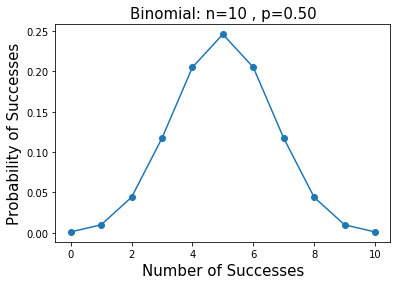

In [144]:
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' %(n,p),fontsize=15)
plt.xlabel('Number of Successes',fontsize=15)
plt.ylabel('Probability of Successes',fontsize=15)
plt.show()

### Distribuição de Poisson

<br>
<img src="img/poisson.png" width=400>
<br>

#### É uma distribuição de probabilidade de variável aleatória **discreta** que expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem **independentemente** de quando ocorreu o último evento. Por exemplo, o número de filhos de um casal, o número de clientes que entram em um banco durante a manhã ou o número de falhas de um carro durante um trajeto (embora exista o argumento de que esses eventos não são exatamente independentes).

#### Esta distribuição tem $\lambda$ como parâmetro, que é sempre maior que zero. **Este parâmetro indica o número médio de ocorrências de um evento por unidade contínua (como tempo ou espaço)**. Por exemplo, se o evento ocorre a uma média de 4 minutos, e estamos interessados no número de eventos que ocorrem num intervalo de 10 minutos, usariámos como modelo a distribuição de Poisson com $\lambda = 'frac{10}{4} = 2.5$ .

#### Quando uma variável **_X_** segue uma [distribuição de Poisson](https://en.wikipedia.org/wiki/Poisson_distribution), escreve-se **_X ~ Poisson ($\lambda$)_** e a função de probabilidade é:

\begin{equation*}
f(x)=  \dfrac{e^{-\lambda}  \lambda^x}{x!}
\end{equation*}

* $e$ é base do logaritmo natural ($e$ = 2.71828...),
* ! significa fatorial, muito usado em arranjos e permutações. Ex: Placa de carro.

#### A distribuição de Poisson representa um modelo probabilístico adequado para o estudo de um grande número de fenômenos observáveis. Eis alguns exemplos:

- Chamadas telefônicas por unidade de tempo;
- Defeitos por unidade de área;
- Acidentes por unidade de tempo;
- Chegada de clientes a um supermercado por unidade de tempo;
- Número de glóbulos sangüíneos visíveis ao microscópio por unidade de área;
- Número de partículas emitidas por uma fonte de material radioativo por unidade de tempo.

#### Nota: tanto a média quanto a variância em uma distribuição de Poisson é dado por $\lambda$

### Exemplo

#### Propomos o exemplo de um trem onde ocorre uma **média de 1,5 falhas por dia**, portanto $\lambda = 1,5 $ e nossa função de probabilidades.

\begin{equation*}
f(x)= e^{-1.5} \dfrac{1.5^x}{x!}
\end{equation*}

#### Vamos obter um conjunto de dados provenientes de uma distribuição de Poisson para um ano através da chamada à função `poisson`, com a motivação de modelar o problema apresentado.

#### Definimos os parâmetros para a distribuição não utilizamos a palavra lambda porque está reservada.

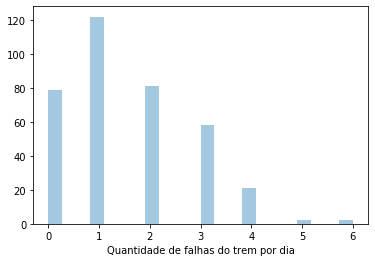

In [145]:
# Número de falhas diárias
parametro_lambda = 1.5

# Definimos a quantidade de dias em que contamos quantas falhas houve.
dias_contados = 365

# Fixando a semente para início da criação dos valores da distribuição
np.random.seed(seed = 24)

# poisson retorna a quantidade de falhas por dia.
samples_poisson = np.random.poisson(lam = parametro_lambda, 
                                    size = dias_contados
                                   )

# construímos o gráfico
eixo_x = 'Quantidade de falhas do trem por dia'
sns.distplot(samples_poisson, axlabel = eixo_x, kde = False);

#### O método [np.random.poisson()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.poisson.html) cria amostras de uma distribuição de Poisson. A distribuição de Poisson é o limite da distribuição binomial para N. grande. Com a função [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) podemos obter as contagens únicas de cada valor para as "quantidade de falhas do trem por dia".

In [146]:
unique, counts = np.unique(samples_poisson, return_counts = True)
dict(zip(unique, counts))

{0: 79, 1: 122, 2: 81, 3: 58, 4: 21, 5: 2, 6: 2}

#### A seguir, uma amostra dos cem primeiros pontos.

In [147]:
samples_poisson[:100]

array([3, 3, 0, 1, 3, 1, 4, 6, 1, 4, 3, 2, 0, 2, 4, 3, 3, 2, 0, 2, 1, 1,
       2, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 3, 1, 0, 3, 0, 1, 0, 2,
       0, 3, 1, 1, 3, 0, 4, 1, 1, 3, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 4, 1,
       1, 4, 0, 3, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 3, 1, 1, 2, 0, 1, 0, 1,
       2, 3, 0, 3, 1, 1, 3, 3, 1, 4, 0, 3])

#### E o tamanho da amostra.

In [148]:
samples_poisson.size

365

### Distribuição Normal.

## Definição de Distribuição Normal

A distribuição normal (ou Guassiana) modela uma grande quantidade de variáveis observadas na natureza, como a estatura ou peso de uma população.

Também sob certas condições, algumas distribuições se comportam como normais, isto é conhecido como o **teorema do limite central**.

É possível ajustar uma distribuição de Poisson a uma normal quando $\lambda$ é um valor de grande magnitude (rodar posteriormente a distribuição Poisson alterando o lambda para algo em torno de 15 e dias_contados para em torno de 3000 onde a forma da distribuição ficará parecida com a normal).

Também é possível ajustar uma binomial a uma distribuição normal fazendo-se uma normalização dos dados. Para isso, propõe-se como exemplo agregar o argumento ```fit=stats.norm``` à construção do gráfico.

Dizemos que uma variável aleatória _**X**_ segue uma distribuição normal **_X ~ N ( $\mu$, $\sigma$)_** se sua distribuição de probabilidades estiver dada por:

\begin{equation*}
p(x)= \dfrac{1}{\sqrt{2 \pi \sigma^²}} * e^ \dfrac{-(x-\mu)^2}{2 \sigma^2}
\end{equation*}



## Exemplo 1:

#### Para a definição de uma distribuição normal, é necessário estabelecer uma média e um desvio padrão, como as características de uma certa amostra. 

#### Imaginemos um exemplo em que temos uma população de pessoas cuja altura segue uma distribuição normal, com $\mu = 1.67 $ m e $\sigma = 0.15 $ m

#### A seguir, vamos usar um conjunto de amostras que vêm de uma distribuição normal, chamando à função [`.np.random.normal()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) do numpy com os parâmetros propostos.

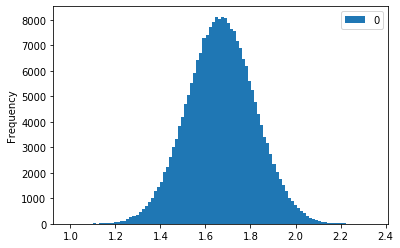

In [152]:
# Gerando valores para uma distribuição normal e plotando um histograma
mean = 1.67
std = 0.15
population = 225000
pd.DataFrame(np.random.normal(loc = mean, scale = std, size = population)).plot.hist(bins = 100)

## Exemplo 2:

#### Da mesma forma, imaginemos um exemplo em que temos uma amostra de ursos cujo peso segue uma distribuição normal, com $\mu = 342,73 $ kg e $\sigma = 45,78 $ kg

#### Também vamos usar um conjunto de amostras que vêm de uma distribuição normal, chamando à função [`.np.random.normal()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) do numpy com os parâmetros propostos.

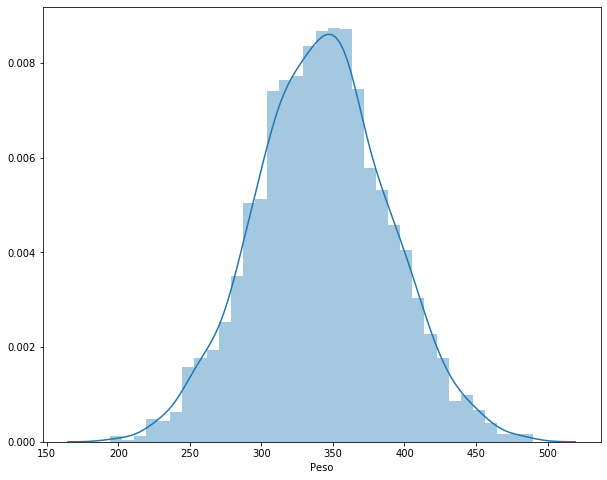

In [153]:
# definimos a média
media = 342.73

# definimos o desvio padrão
desvio_padrao = 45.78

# quantidade de amostras na população
n_amostras = 3000

# chamamos à função normal
samples_normal = np.random.normal(loc = media, 
                                  scale = desvio_padrao, 
                                  size = n_amostras
                                 )

# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize = (10,8))
sns.distplot(samples_normal, axlabel = eixo_x)
plt.show()